# Using OpenCV and the Model generated, testing it on sample images.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io, color, exposure
from skimage.transform import rescale, resize

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [2]:
def isolate_face_from_image(img):
    """
    Isolates the face from the image and rescales it to 48x48.
    """
    img = cv2.imread(img) 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.5, 5)
    face_crop = []
    
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),2)
        face_crop.append(img[y:y+h, x:x+w])
    plt.imshow(img)
    plt.show()
    
    img = face_crop[0]
    print('before:',img.shape)
    # Convert to a 1-D image
    img = color.rgb2gray(img) 
    plt.imshow(img, cmap='gray')
    plt.title('Cropped from the test image')
    plt.show()
    
    print('after:',img.shape)
    image_resized = resize(img, (48, 48), mode='constant')
    # Resized image
    plt.imshow(image_resized, cmap='gray')
    plt.title('Resized image 48x48 pixels')
    plt.show()
    
    cv2.destroyAllWindows()
    return image_resized.reshape(-1,48,48,1)

In [3]:
from keras.models import Model, model_from_json, load_model

Using TensorFlow backend.


In [4]:
model = load_model("../Models/fer_Deep_BN_V3_CNN.h5")

In [5]:
emotion = {0:'Angry',1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}

In [6]:
def show_emotion(emo):
    """
    Returns emotion after prediction.
    """
    return emotion[np.argmax(emo, axis=None, out=None)]

In [7]:
def show_predicted_probs(pred):
    """
    Shows predicted probabilities of each expression.
    """
    y = pred[0,:]
    x = range(len(emotion))
    fig, ax = plt.subplots()
    ax.bar(x, y)
    ax.set_xticklabels(['']+list(emotion.values()), rotation=45)
    plt.title('Predicted probabilities of each expression.')
    plt.xlabel('Emotions')
    plt.ylabel('Percentage (%)')
    plt.show()

In [8]:
def predict_demo_img(img):
    """
    Consolidated function which predicts and shows the predicted probabilities.
    """
    pred = model.predict(isolate_face_from_image(img))
    show_predicted_probs(pred)
    print('Predicted as:', show_emotion(pred))

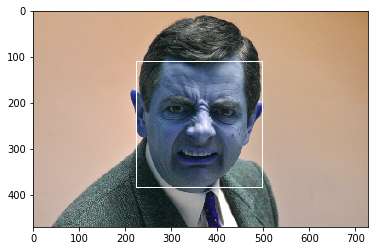

before: (273, 273, 3)


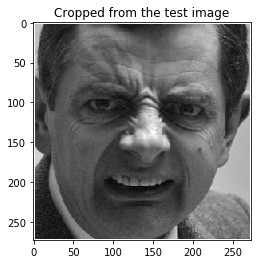

after: (273, 273)


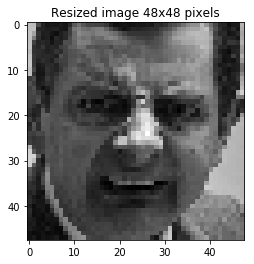

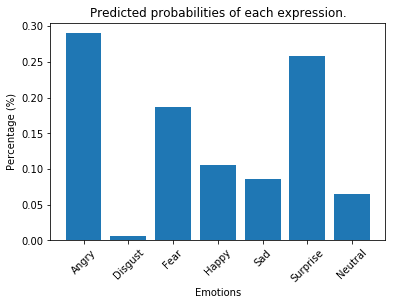

Predicted as: Angry


In [9]:
predict_demo_img('mrbean_disgust.jpg')

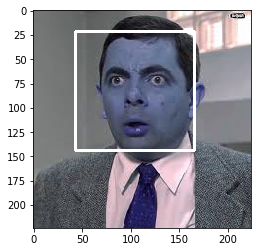

before: (122, 122, 3)


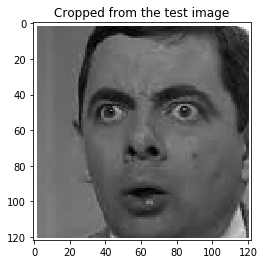

after: (122, 122)


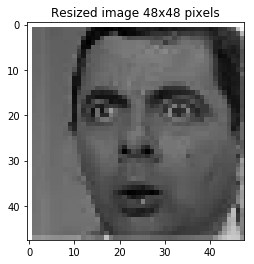

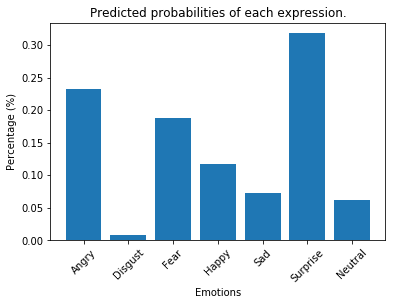

Predicted as: Surprise


In [10]:
predict_demo_img('mrbean_suprise.jpg')

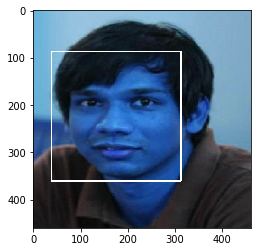

before: (273, 273, 3)


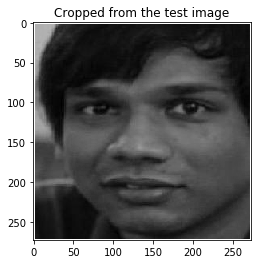

after: (273, 273)


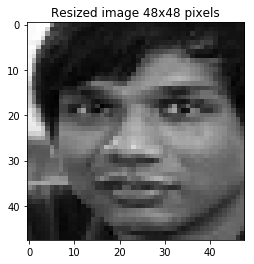

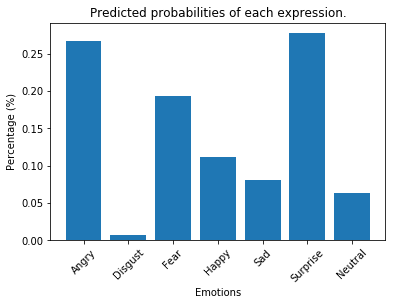

Predicted as: Surprise


In [11]:
predict_demo_img('github_testimg.png')